In [25]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

results_path = "/home/dit905/bmi707/bmi707_alzheimers_mri_prediction/results/pretrainedfinal_noaug"
predictions = {
    "train": pd.read_csv(os.path.join(results_path, "train_predictions.csv")), 
    "val": pd.read_csv(os.path.join(results_path, "validation_predictions.csv")),
    "test": pd.read_csv(os.path.join(results_path, "test_predictions.csv"))
}
true_df = pd.read_csv("/home/dit905/bmi707/bmi707_alzheimers_mri_prediction/data/metadata.csv")

Training accuracy: 0.99509


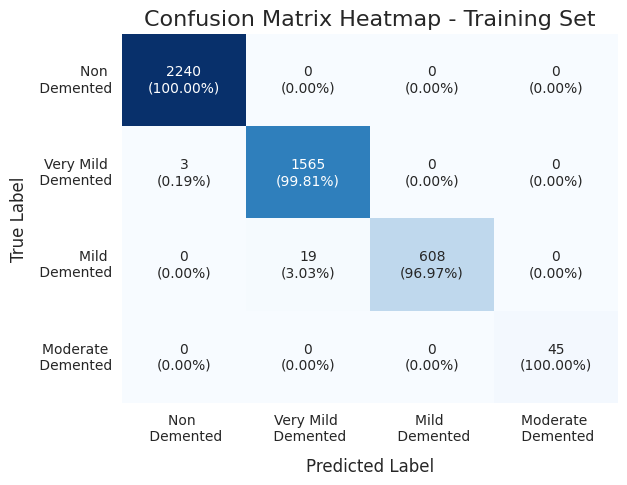

Validation accuracy: 0.96656


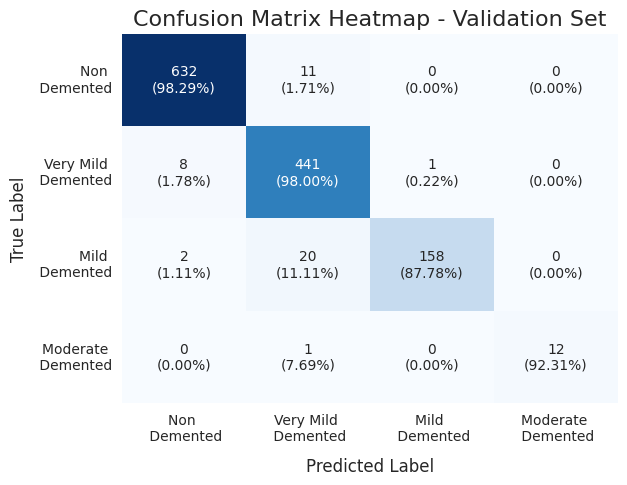

Test accuracy: 0.96057


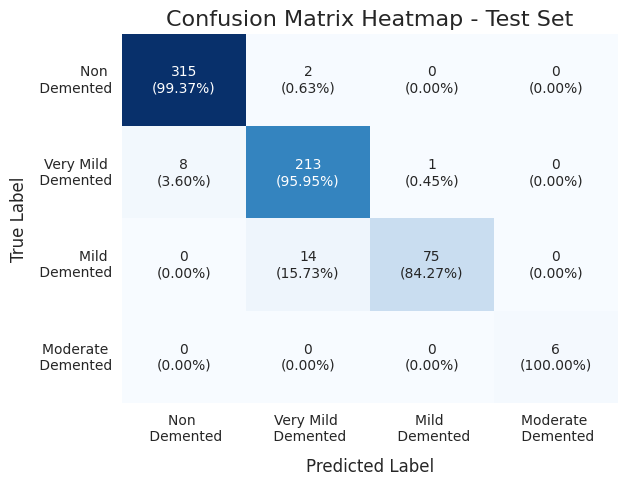

In [26]:
for pred in predictions:
    predictions[pred] = pd.merge(true_df, predictions[pred], how='inner', on='name')

for pred, name in zip(predictions.keys(), ["Training", "Validation", "Test"]):
    true = predictions[pred]['label']
    pred = predictions[pred]['prediction']
    print(f"{name} accuracy: {np.sum(true == pred) / len(pred):.5f}")
    cf_mat = confusion_matrix(true, pred)
    
    counts = ['{0:0.0f}'.format(value) for value in cf_mat.flatten()]

    percentages = ['({0:.2%})'.format(value) for value in cf_mat.flatten()/np.repeat(np.sum(cf_mat, axis=1), 4)]
    labels = [f'{v1}\n{v2}' for v1, v2 in
            zip(counts, percentages)]
    labels = np.asarray(labels).reshape(4,4)

    tick_labels = ["Non \n Demented", "Very Mild \n Demented", "Mild \n Demented", "Moderate \n Demented"]

    sns.heatmap(cf_mat, annot=labels, fmt='', cmap='Blues', xticklabels=tick_labels, yticklabels=tick_labels, cbar=False)
    plt.xticks(rotation = 0)
    plt.yticks(rotation = 0)
    plt.title(f'Confusion Matrix Heatmap - {name} Set', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12, labelpad=10)
    plt.ylabel('True Label', fontsize=12, labelpad=5)
    #plt.savefig(f"confusion_{name}", dpi=1000, bbox_inches="tight")
    plt.show()

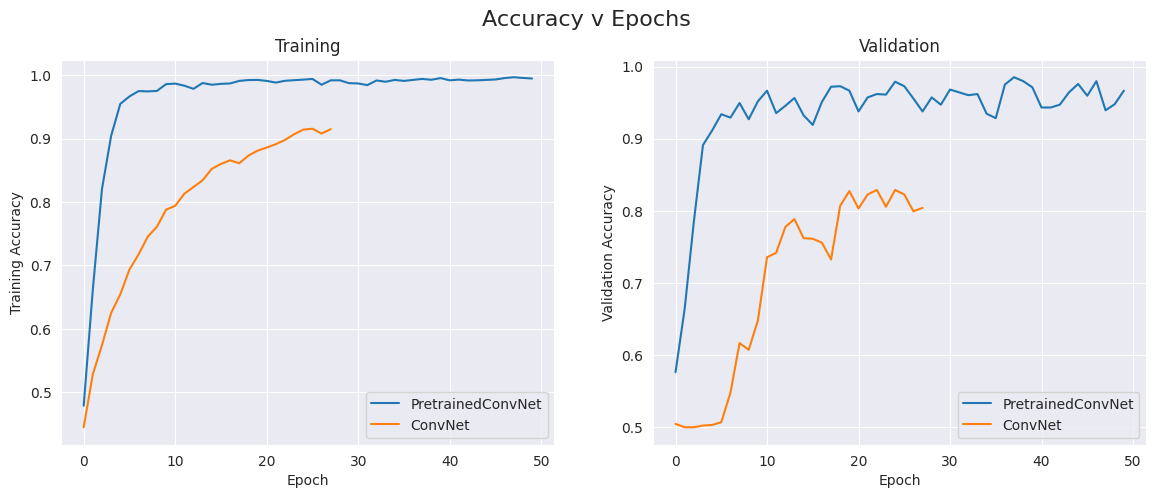

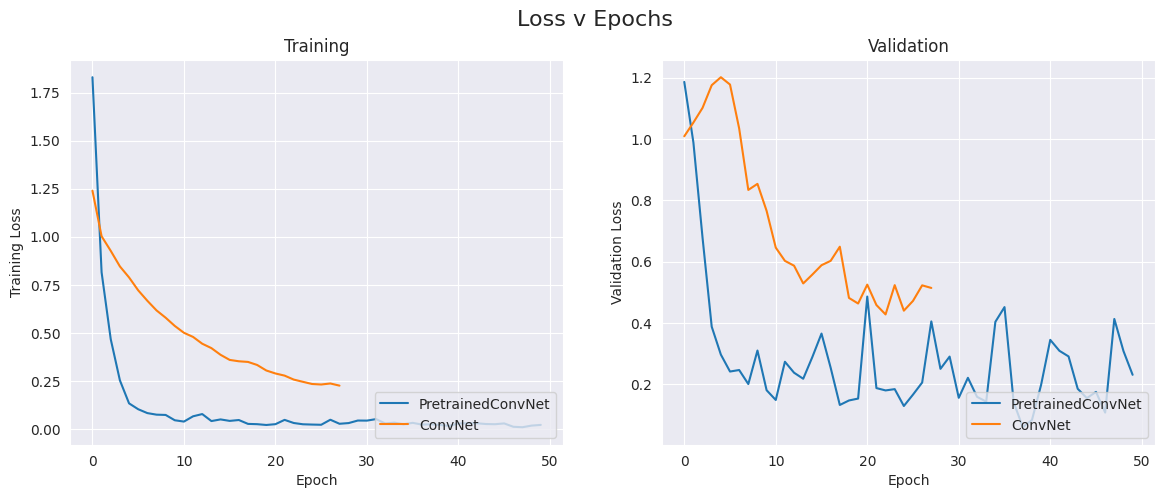

In [29]:
sns.set_style("darkgrid")

model_results_paths = [
    "/home/dit905/bmi707/bmi707_alzheimers_mri_prediction/results/pretrainedfinal_noaug",
    "/home/dit905/bmi707/bmi707_alzheimers_mri_prediction/results/convnetfinal"
]
model_names = ["PretrainedConvNet", "ConvNet"]
results = {}
for model_path, model_name in zip(model_results_paths, model_names):
    with open(os.path.join(model_path, "history.json")) as json_file:
        results[model_name] = json.load(json_file)
        
for monitor in ["accuracy", "loss"]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    for model_name in results:
        epoch = np.arange(len(results[model_name][monitor]))
        sns.lineplot(data=results[model_name], x=epoch, y=monitor, label=model_name, ax=axes[0])
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel(f'Training {monitor.title()}')
    axes[0].set_title('Training')
    axes[0].legend(loc='lower right')


    for model_name in results:
        epoch = np.arange(len(results[model_name][monitor]))
        sns.lineplot(data=results[model_name], x=epoch, y=f'val_{monitor}', label=model_name, ax=axes[1])
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel(f'Validation {monitor.title()}')
    axes[1].set_title('Validation')
    axes[1].legend(loc='lower right')

    fig.suptitle(f'{monitor.title()} v Epochs', fontsize=16)
    plt.show()

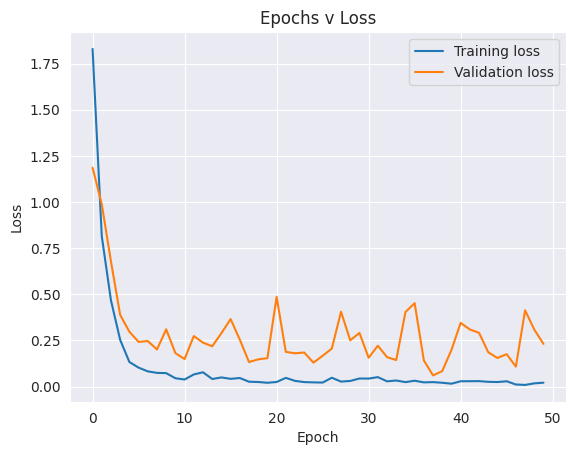

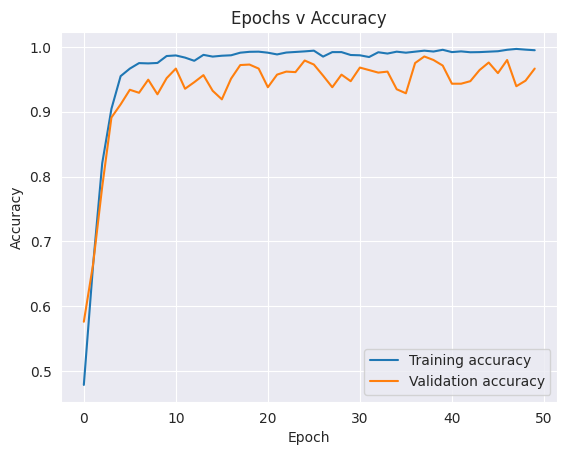

In [30]:
sns.set_style("darkgrid")

model_results_paths = [
    "/home/dit905/bmi707/bmi707_alzheimers_mri_prediction/results/convnetfinal",
    "/home/dit905/bmi707/bmi707_alzheimers_mri_prediction/results/pretrainedfinal_noaug",
]
model_names = ["ConvNet", "PretrainedConvNet"]
results = {}
for model_path, model_name in zip(model_results_paths, model_names):
    with open(os.path.join(model_path, "history.json")) as json_file:
        results[model_name] = json.load(json_file)
        
model_name = "PretrainedConvNet"
for monitor in ["loss", "accuracy"]:
    epoch = np.arange(len(results[model_name][monitor]))
    sns.lineplot(data=results[model_name], x=epoch, y=monitor, label=f"Training {monitor}")
    sns.lineplot(data=results[model_name], x=epoch, y=f"val_{monitor}", label=f"Validation {monitor}")
    plt.xlabel('Epoch')
    plt.ylabel(f'{monitor.title()}')
    plt.title(f'Epochs v {monitor.title()}')
    plt.legend()
    plt.savefig(f"{monitor}_results.png", dpi=1000)
    plt.show()